# Linear Regression

In [1]:
import pandas as pd  
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
dataset = pd.read_csv('Weather.csv')

C:\Users\prave\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dataset.shape

(119040, 31)

In [4]:
dataset.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [4]:
dataset.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


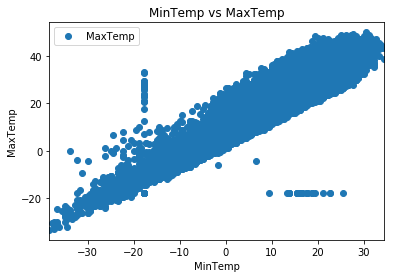

In [5]:
#Let's plot the valuess of Min and Max temp

plt.plot(dataset.MinTemp, dataset.MaxTemp, 'o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

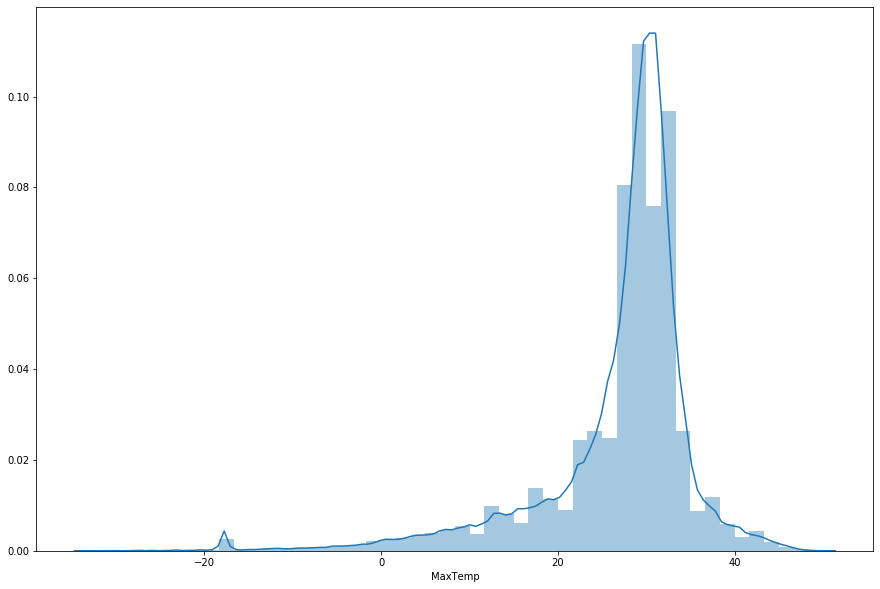

In [5]:
#Let's plot Max temp distribution

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['MaxTemp'])
plt.show()

In [6]:
#Divide data into Attributes and Labels

X = dataset['MinTemp'].values.reshape(-1,1)
y = dataset['MaxTemp'].values.reshape(-1,1)

In [8]:
#Let's split the data in 80 - 20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
#Let's create the model

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[10.66185201]
[[0.92033997]]


In [11]:
# Predict using the model

y_pred = regressor.predict(X_test)

In [12]:
#Check actual vs predicted

df = pd.DataFrame({'Actual': y_test.flatten(), 
                   'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852


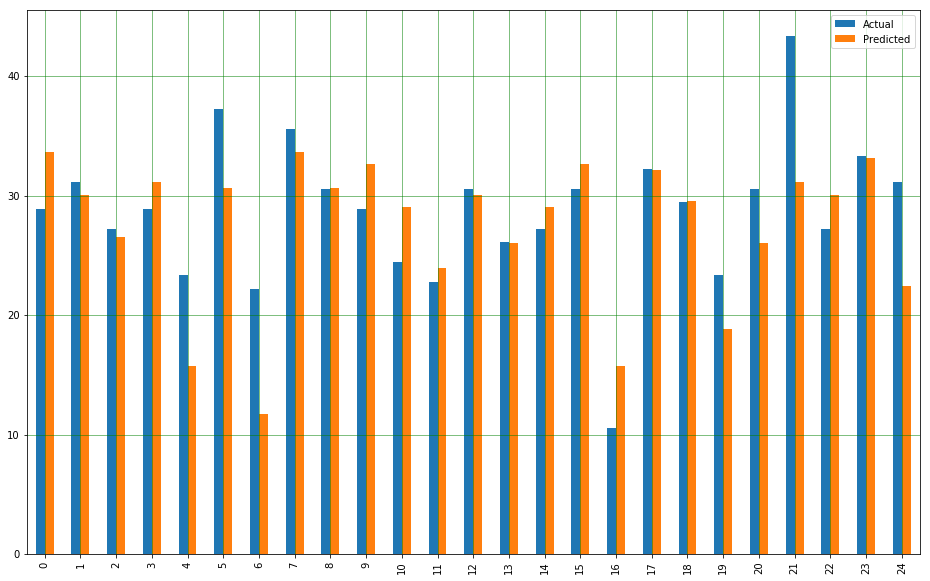

In [13]:
#Plot actual vs predicted for some records

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

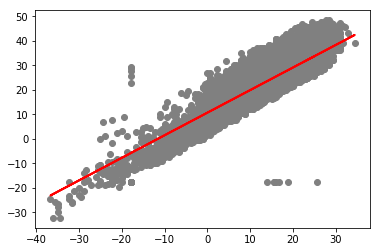

In [14]:
#Plot our regression line

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [15]:
#Calculate model metrics

print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785285
Mean Squared Error: 17.631568097568444
Root Mean Squared Error: 4.198996082109204


In [16]:
# Calculate R squared

r_squared = metrics.r2_score(y_test, y_pred)

r_squared

0.7670218843587764

In [ ]:
!pip install statsmodels

## Use statsmodels to get p value, adjusted R Squared

In [14]:
import statsmodels.api as sm

model = sm.OLS(X_train, y_train)
model_fit = model.fit()
print(model_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                          1.943e+06
Date:                Thu, 06 Feb 2020   Prob (F-statistic):                        0.00
Time:                        18:34:18   Log-Likelihood:                     -2.7287e+05
No. Observations:               95232   AIC:                                  5.457e+05
Df Residuals:                   95231   BIC:                                  5.458e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Multiple Linear Regression

In [15]:
import pandas as pd  
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [16]:
dataset = pd.read_csv('winequality.csv')

In [17]:
dataset.shape

(1599, 12)

In [18]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
dataset.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [20]:
dataset = dataset.fillna(method='ffill')
dataset = dataset.fillna(method='bfill')

In [21]:
list = ['fixed acidity', 'volatile acidity', 
        'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide', 
        'total sulfur dioxide', 'density', 'pH', 
        'sulphates','alcohol']

In [32]:
X = dataset.drop('quality',axis=1)
y = dataset['quality']

In [33]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [34]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

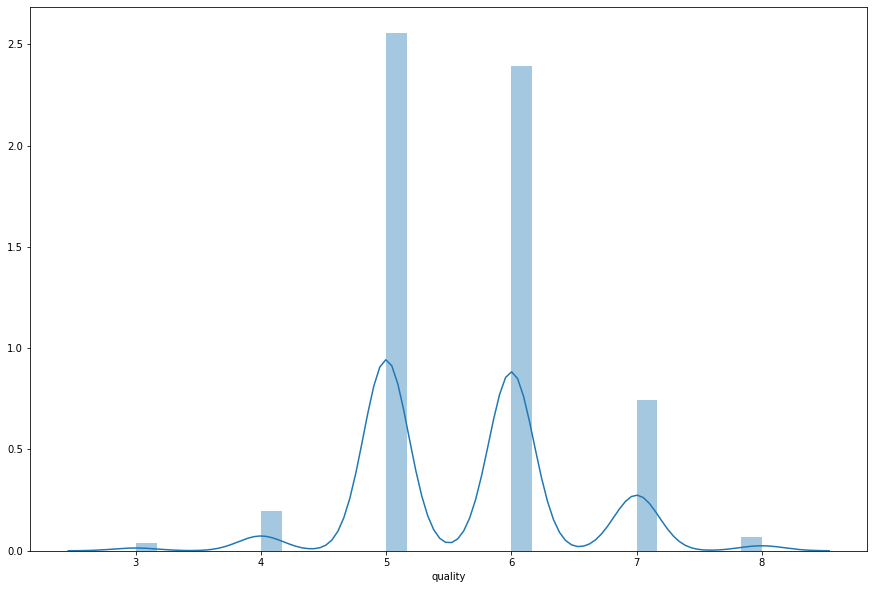

In [35]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['quality'])
plt.show()

In [36]:
X_train, X_test, y_train, y_test = 
train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
regressor = LinearRegression(n_jobs=-1,normalize=True)  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [47]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, 
                        columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


In [39]:
#Use model to predict

y_pred = regressor.predict(X_test)

In [40]:
#Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

df.head()

,Actual,Predicted
1109,6,5.782930
1032,5,5.036193
1002,7,6.596989
487,6,5.339126
979,5,5.939529


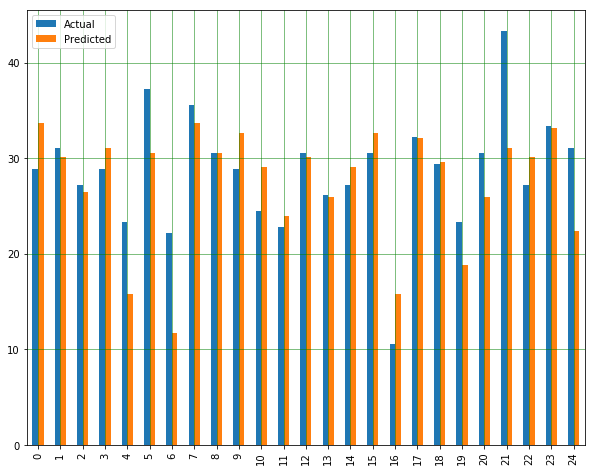

In [33]:
#Let's plot actual vs predicted

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', 
         color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', 
         color='black')
plt.show()

In [34]:
#Calculate the absolute value of difference
df['Diff'] = abs(df['Predicted'] - df['Actual'])

df['Diff_Squared'] = (df['Predicted'] - df['Actual'])**2

df.head()

,Actual,Predicted,Diff,Diff_Squared
0,6,5.782930,0.217070,0.047119
1,5,5.036193,0.036193,0.001310
2,7,6.596989,0.403011,0.162418
3,6,5.339126,0.660874,0.436754
4,5,5.939529,0.939529,0.882715


In [35]:
MAE = df['Diff'].sum()/df['Diff'].count()
MSE = df['Diff_Squared'].sum()/df['Diff'].count()
RMSE = sp.sqrt(df['Diff_Squared'].sum()/df['Diff'].count())

print(MAE,MSE,RMSE)

0.46963309286611 0.38447119782012373 0.6200574149384263


In [49]:
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 0.4696330928661121
Mean Squared Error: 0.3844711978201256
Root Mean Squared Error: 0.6200574149384278
0.3283887639580201


In [37]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
model_fit = model.fit()
print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     8683.
Date:                Fri, 18 Oct 2019   Prob (F-statistic):               0.00
Time:                        19:25:16   Log-Likelihood:                -1269.9
No. Observations:                1279   AIC:                             2562.
Df Residuals:                    1268   BIC:                             2619.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0084      0.019      0.451      0.6